<a href="https://colab.research.google.com/github/mdkamrulhasan/machine_learning_concepts/blob/master/notebooks/supervised/Classification_cc_imbalance_data_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today, we will learn about a classical classification problem linked to imbalanced data distributions. We will try a few models and learn about a few metrics other than the accuray:


 *   precision
 *   recall
 *   f1 score

To learn the above metrices, we would also need to learn about an important concept what we call "**Confusion matrix**"


In [ ]:
import numpy as np
import pandas as pd
# Models (Sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data and Evaluation packages
from sklearn import datasets
# from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# visualization
import plotly.express as px

[Credit Card Fraud Detection Dataset (src)](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
X, y = df[df.columns[:-1]], df[df.columns[-1]]
X.shape, y.shape

((284807, 30), (284807,))

## Unique y values (i.e the labels)

# Class distribution

In [ ]:
set(y)

{0, 1}

In [ ]:
# len(df[df.Class == 1])/len(df), len(df[df.Class == 0])/len(df)

In [ ]:
# fig = px.pie(df, names='Class')
# fig.show()

## Lets normalize the features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler()
X_scaled = feature_scaler.fit_transform(X)

In [ ]:
X_scaled.min(), X_scaled.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
X = X_scaled

## (50-50) % Train-Test splits

In [ ]:
# test data amount (in terms of proportion)
TEST_PROP = 0.5
# Random number seed; important for experiment reproducibility
RANDOM_SEED = 0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_PROP, random_state=RANDOM_SEED)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142403, 30), (142403,), (142404, 30), (142404,))

## Training and Testing a LR model

In [ ]:
# Create a Logistic Regression Object
clf = LogisticRegression()
# Train the model using the training sets
clf.fit(X_train, y_train)

LogisticRegression()

## Model Accuracy

In [ ]:
# Make predictions using the testing set
y_pred = clf.predict(X_test)
print("accuracy: %.5f" % accuracy_score(y_test, y_pred))

accuracy: 0.99872


## Are you excited about this model performance??

## Will you agree, if I say that this is not poor model/fit??

## Confusion Matrix

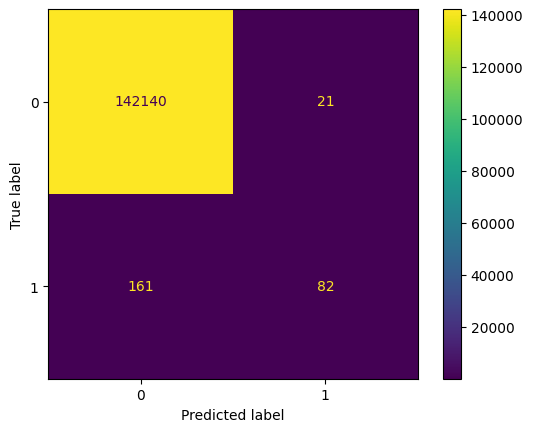

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# Precision, Recall, F1 Score
print("precision: %.5f" % precision_score(y_test, y_pred))
print("recall: %.5f" % recall_score(y_test, y_pred))
print("f1 score: %.5f" % f1_score(y_test, y_pred))

precision: 0.67123
recall: 0.21973
f1 score: 0.33108


## Testing with the Random Forest model

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

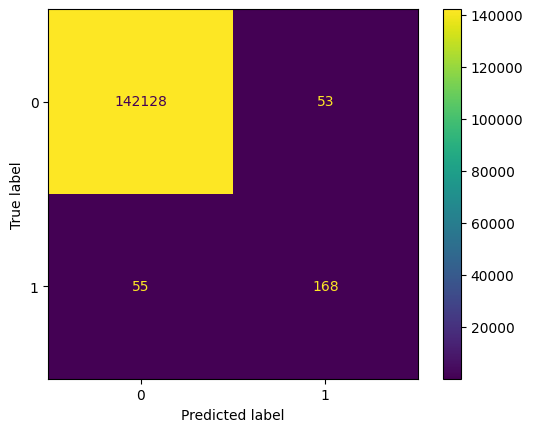

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# accuracy
print("accuracy: %.5f" % accuracy_score(y_test, y_pred))

accuracy: 0.99872


In [ ]:
# Precision, Recall, F1 Score
print("precision: %.5f" % precision_score(y_test, y_pred))
print("recall: %.5f" % recall_score(y_test, y_pred))
print("f1 score: %.5f" % f1_score(y_test, y_pred))

precision: 0.79612
recall: 0.33745
f1 score: 0.47399


## Testing with the SVC model

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

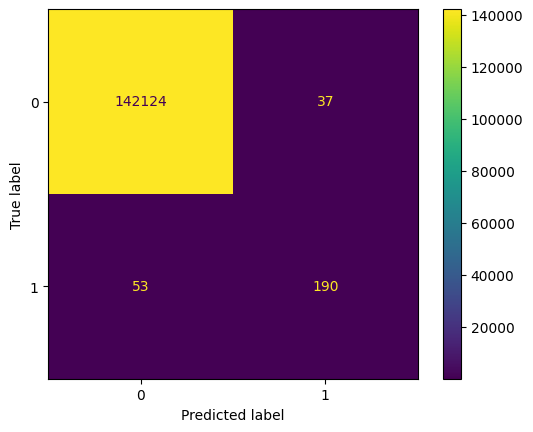

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# accuracy
print("accuracy: %.5f" % accuracy_score(y_test, y_pred))

accuracy: 0.99937


In [ ]:
# Precision, Recall, F1 Score
print("precision: %.5f" % precision_score(y_test, y_pred))
print("recall: %.5f" % recall_score(y_test, y_pred))
print("f1 score: %.5f" % f1_score(y_test, y_pred))

precision: 0.83700
recall: 0.78189
f1 score: 0.80851


## Boosting

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# accuracy
print("accuracy: %.5f" % accuracy_score(y_test, y_pred))

In [ ]:
# Precision, Recall, F1 Score
print("precision: %.5f" % precision_score(y_test, y_pred))
print("recall: %.5f" % recall_score(y_test, y_pred))
print("f1 score: %.5f" % f1_score(y_test, y_pred))